In [1]:
#共通前処理

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib

#データフレーム表示用関数
from IPython.display import display

#表示オプションの調整
np.set_printoptions(suppress=True, precision=4)
pd.options.display.float_format = '{:.4f}'.format

#データフレームの全項目を表示する
pd.set_option('display.max_columns', None)

#グラフのデフォルト設定
plt.rcParams['font.size'] = 14

#乱数
random_seed = 123


In [4]:
#データの読み込み
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases\
/00292/Wholesale%20customers%20data.csv'

df = pd.read_csv(url)

#カラム名を日本語へ変換する
columns = ['販売チャネル', '地域', '生鮮食品', '乳製品', '食料品', 
    '冷凍食品', '洗剤_紙製品', '総菜']

df.columns = columns

In [8]:
#データの確認
display(df.head())

#サイズの確認
df.shape

,販売チャネル,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


(440, 8)

In [9]:
#欠損値の確認
print(df.isnull().sum())

販売チャネル    0
地域        0
生鮮食品      0
乳製品       0
食料品       0
冷凍食品      0
洗剤_紙製品    0
総菜        0
dtype: int64


In [11]:
#販売チャネルのコード確認
print(df['販売チャネル'].value_counts())

print()
#地域コード確認
print(df['地域'].value_counts())


1    298
2    142
Name: 販売チャネル, dtype: int64

3    316
1     77
2     47
Name: 地域, dtype: int64


販売チャネルの意味:1、ホテル・カフェ・レストラン    
                   2、小売業 
<br>
<br>
地域の意味:1、リスボン  
           2、オポルト  
           3、その他

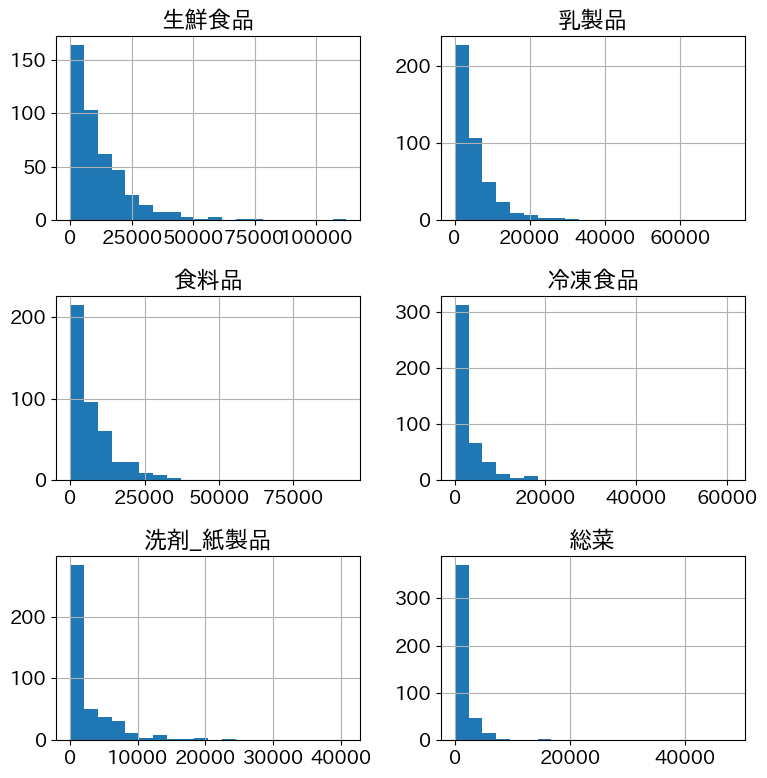

In [13]:
#購買価格のヒストグラムの表示
#販売チャネルと地域を抜いたデータを作成する
df2 = df.drop(['販売チャネル', '地域'], axis=1)

#分析対象項目のヒストグラムを表示する
from pylab import rcParams
rcParams['figure.figsize'] = (8,8)
df2.hist(bins=20)
plt.tight_layout()
plt.show()

#横軸は購入価格
#データの分布としては金額の低いものが購入頻度が多い
#金額が上がるにつれて棒が小さくなっている

データの確認が終わったのでクラスタリングの実施  
欠損値は存在せずきれいなデータだったので前処理は特に不要

In [14]:
#データの前処理とデータの分割は不要

#アルゴリズムの選定
from sklearn.cluster import KMeans

#グループ数を変数へ持たせておく
clusters = 4

#アルゴリズムの初期化
algrithm = KMeans(n_clusters=clusters, random_state=random_seed)

In [15]:
#学習と予測の実施
y_pred = algrithm.fit_predict(df2)

#結果確認
print(y_pred[:20])

[1 2 1 1 0 1 1 1 1 2 2 1 0 2 0 1 2 1 1 1]


クラスタリングが完了したので分析

In [16]:
#グループごとの平均値を計算する
df_cluster = df2.groupby(y_pred).mean()
display(df_cluster)

#横軸はグループの番号

,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
0,36144.4828,5471.4655,6128.7931,6298.6552,1064.0000,2316.7241
1,9087.4638,3027.4275,3753.5145,2817.9855,1003.0036,1040.5254
2,4808.8421,10525.0105,16909.7895,1462.5895,7302.4000,1650.8842
3,19888.2727,36142.3636,45517.4545,6328.9091,21417.0909,8414.0000


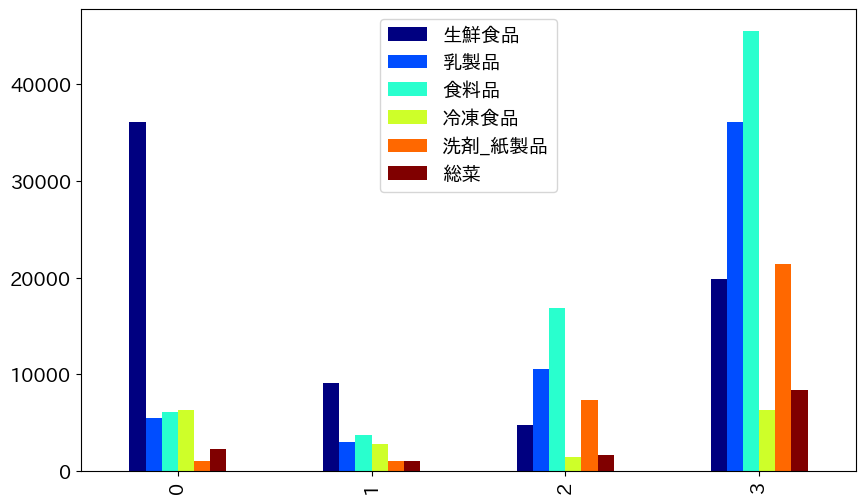

In [18]:
#グループ別の棒グラフ
df_cluster.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='jet')
plt.show()

#顧客を特徴ごとにグループ化する

==== グループ0 ====


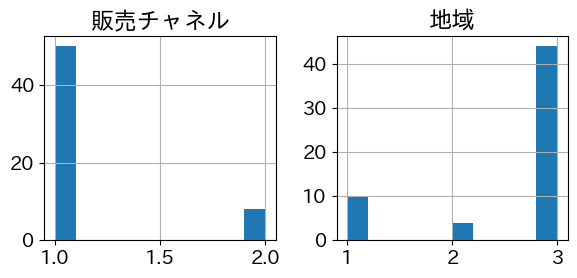

==== グループ1 ====


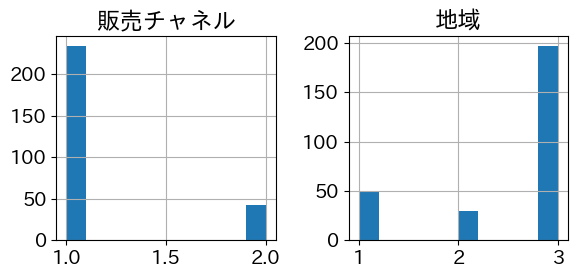

==== グループ2 ====


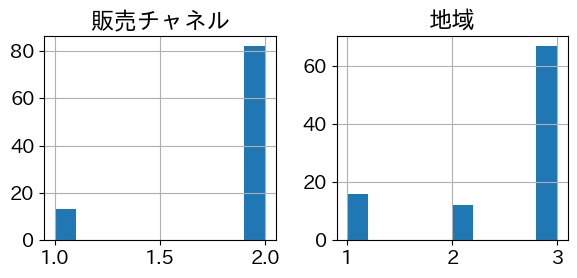

==== グループ3 ====


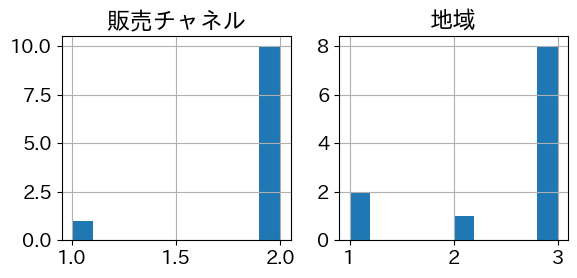

In [20]:
#上で出したグループと、チャネル・地域の関係を調べる

#販売チャンネルと地域だけをdf3へ
df3 = df[['販売チャネル', '地域']]

#グラフの大きさ
rcParams['figure.figsize'] = (6,3)

#グループごとのグラフ表示
for i in range(clusters):
    fig, ax = plt.subplots()
    w = df3[y_pred==i]
    print(f'==== グループ{i} ====')
    w.hist(ax=ax)
    plt.tight_layout()
    plt.show()
    
#地域とグループの関連性は特に見られない

次元圧縮の実施

In [21]:
#次元圧縮のアルゴリズムの選択
from sklearn.decomposition import PCA

#モデルの初期化
pca = PCA(n_components=2)

In [23]:
#学習・変換の実施
d2 = pca.fit_transform(df2)

#結果
print(d2[:5])

[[  650.0221  1585.5191]
 [-4426.805   4042.4515]
 [-4841.9987  2578.7622]
 [  990.3464 -6279.806 ]
 [10657.9987 -2159.7258]]


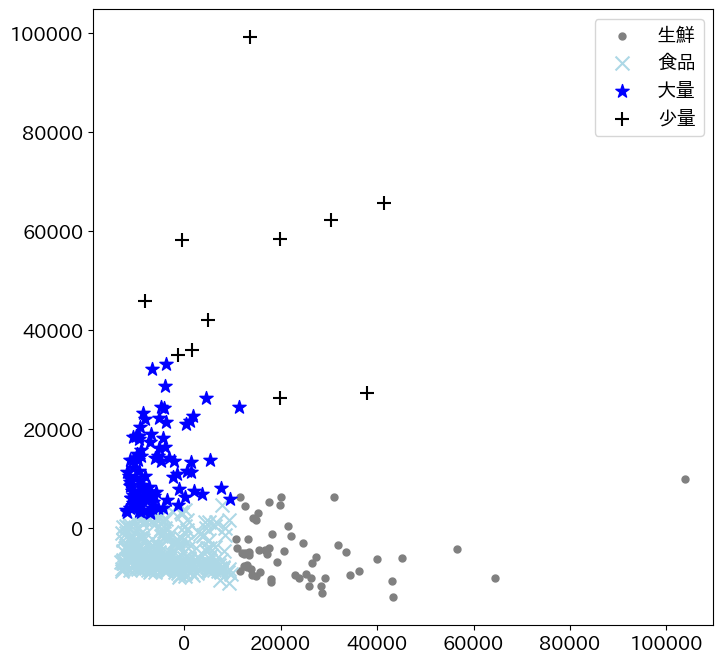

In [25]:
#散布図を表示する
plt.figure(figsize=(8,8))

marks = ['.', 'x', '*', '+']
labels = ['生鮮', '食品', '大量', '少量']
colors = ['grey', 'lightblue', 'blue', 'black']
for i in range(clusters):
    plt.scatter(d2[y_pred==i][:,0], d2[y_pred==i][:,1],
               marker=marks[i], label=labels[i], s=100, c=colors[i])
plt.legend(fontsize=14)
plt.show()


例外値の調査

In [31]:
#生鮮グループの例外を調べる
display(df[d2[:,1] > 90000])

,販売チャネル,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
85,2,3,16117,46197,92780,1026,40827,2944


In [33]:
display(df[d2[:,0] > 100000])

,販売チャネル,地域,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
181,1,3,112151,29627,18148,16745,4948,8550


In [34]:
#統計情報の確認
display(df2.describe())

,生鮮食品,乳製品,食料品,冷凍食品,洗剤_紙製品,総菜
count,440.0000,440.0000,440.0000,440.0000,440.0000,440.0000
mean,12000.2977,5796.2659,7951.2773,3071.9318,2881.4932,1524.8705
std,12647.3289,7380.3772,9503.1628,4854.6733,4767.8544,2820.1059
min,3.0000,55.0000,3.0000,25.0000,3.0000,3.0000
25%,3127.7500,1533.0000,2153.0000,742.2500,256.7500,408.2500
50%,8504.0000,3627.0000,4755.5000,1526.0000,816.5000,965.5000
75%,16933.7500,7190.2500,10655.7500,3554.2500,3922.0000,1820.2500
max,112151.0000,73498.0000,92780.0000,60869.0000,40827.0000,47943.0000
